In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [5]:
from google.colab import files
upload = files.upload()

Saving car_evaluation.csv to car_evaluation.csv


In [12]:
data = pd.read_csv("car_evaluation.csv",header=None)
cols = ['Buying Price', 'Maintenance Cost', 'Doors', 'Persons', ' Luggage Boot Size', 'Safety', 'Class']
data.columns = cols

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Buying Price        1728 non-null   object
 1   Maintenance Cost    1728 non-null   object
 2   Doors               1728 non-null   object
 3   Persons             1728 non-null   object
 4    Luggage Boot Size  1728 non-null   object
 5   Safety              1728 non-null   object
 6   Class               1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [14]:
for i in cols:
  print(data[i].value_counts())

vhigh    432
high     432
med      432
low      432
Name: Buying Price, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: Maintenance Cost, dtype: int64
2        432
3        432
4        432
5more    432
Name: Doors, dtype: int64
2       576
4       576
more    576
Name: Persons, dtype: int64
small    576
med      576
big      576
Name:  Luggage Boot Size, dtype: int64
low     576
med     576
high    576
Name: Safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: Class, dtype: int64


In [16]:
x = data.drop("Class",axis=1)
y = data["Class"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [19]:
encoder = OrdinalEncoder(categories=[
    ['low','med','high','vhigh'],
    ['low','med','high','vhigh'],
    ['2','3','4','5more'],
    ['2', '4', 'more'],
    ['small', 'med', 'big'],
    ['low', 'med', 'high']])

In [20]:
x_train = encoder.fit_transform(x_train)
x_test = encoder.fit_transform(x_test)
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [31]:
cols.remove("Class")
x_train.columns = cols
x_test.columns = cols

In [55]:
dt = DecisionTreeClassifier(criterion="gini",max_depth=5)
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)

In [56]:
accuracy=accuracy_score(y_test,dt_pred)
print(format(accuracy,'.1%'))

89.0%


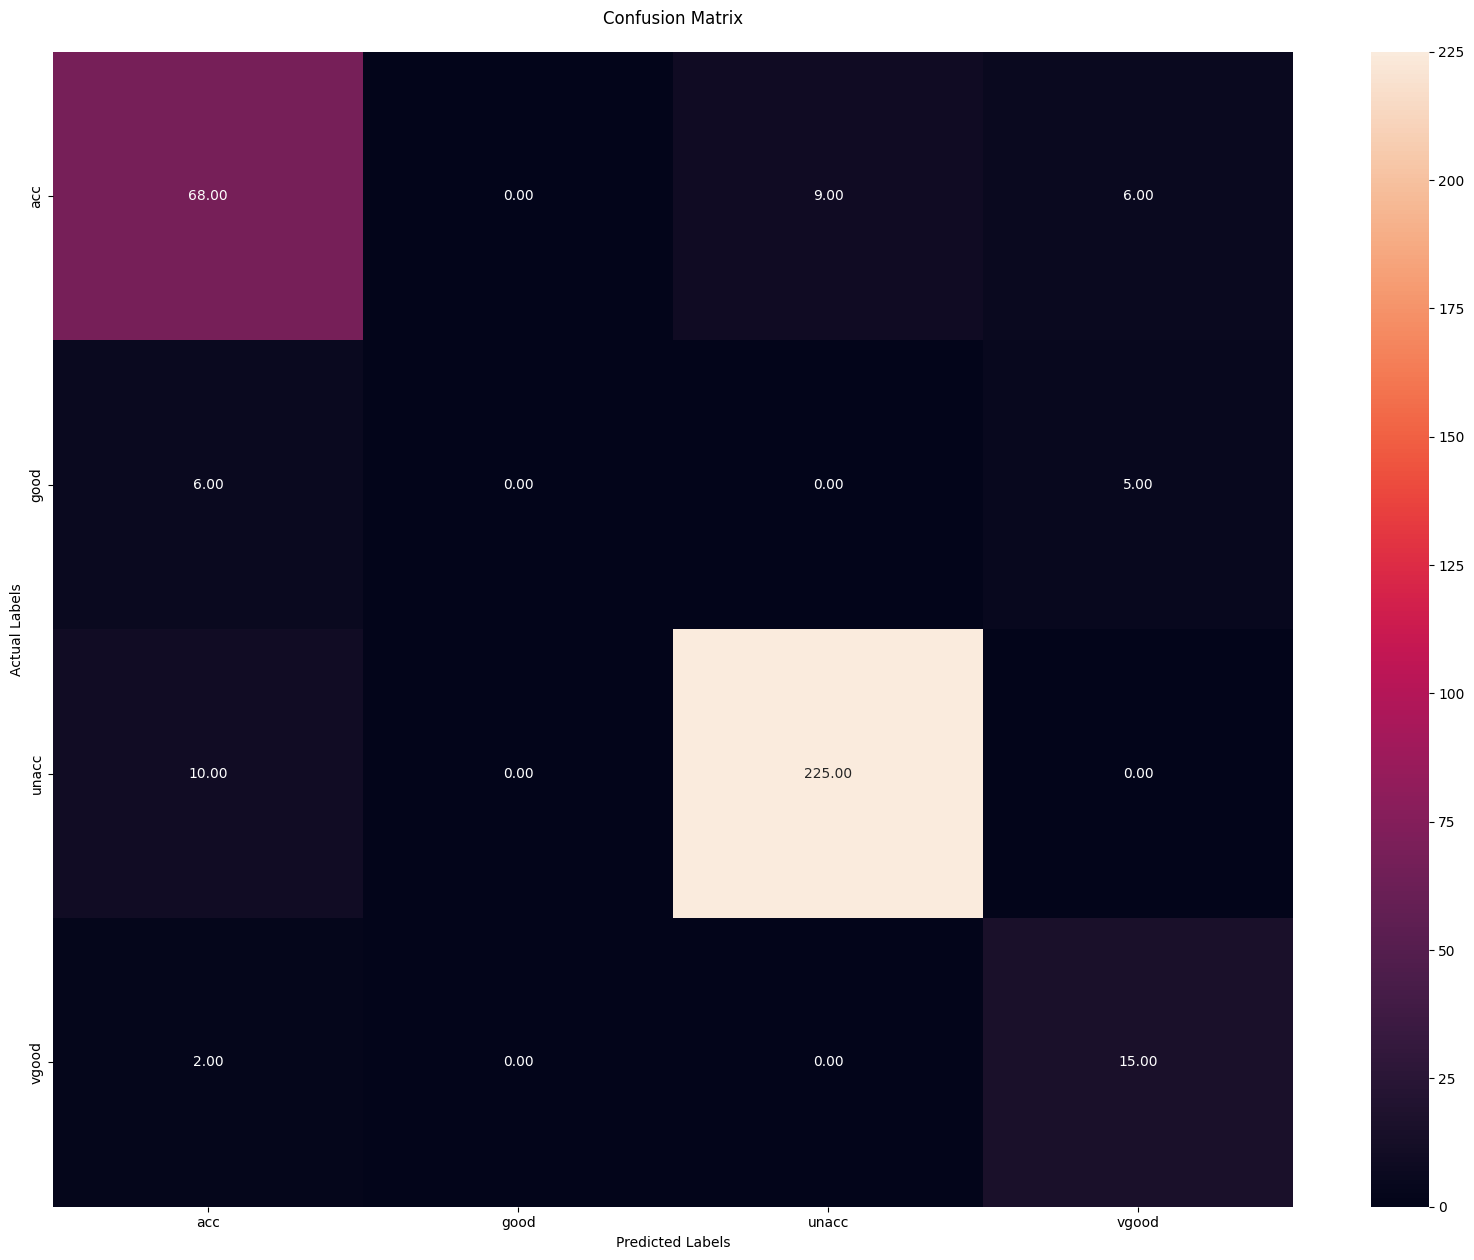

In [57]:
conf = confusion_matrix(y_test,dt_pred)
plt.rcParams.update({"figure.figsize":(20,15)})
plt.title("Confusion Matrix",pad=20)
a = sns.heatmap(conf,annot=True,fmt='.2f')
a.set_xticklabels(['acc','good','unacc','vgood'])
a.set_yticklabels(['acc','good','unacc','vgood'])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels",)
plt.show()

In [58]:
c_names = ['Acceptable', 'Good', 'Unacceptable', 'Very Good']
print(classification_report(y_test ,dt_pred ,target_names=c_names ,zero_division=0.0))

              precision    recall  f1-score   support

  Acceptable       0.79      0.82      0.80        83
        Good       0.00      0.00      0.00        11
Unacceptable       0.96      0.96      0.96       235
   Very Good       0.58      0.88      0.70        17

    accuracy                           0.89       346
   macro avg       0.58      0.66      0.62       346
weighted avg       0.87      0.89      0.88       346



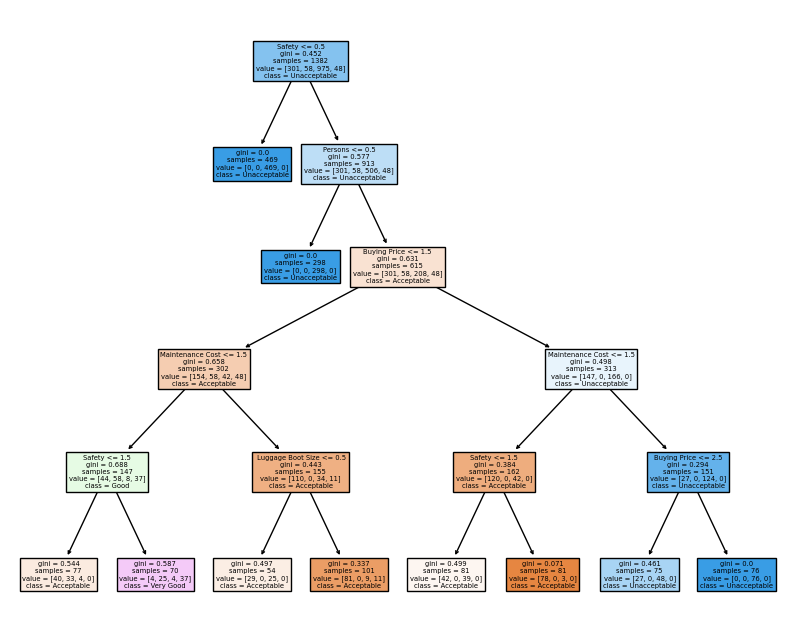

In [59]:
from sklearn import tree
plt.figure(figsize=(10,8))
tree.plot_tree(dt,feature_names=cols,class_names=c_names,filled=True)
plt.show()